# Classifying the MNIST data set with a simple Conv Net.
Fien Ockers, 12-03-2019

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
import random
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

Using TensorFlow backend.


In [2]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

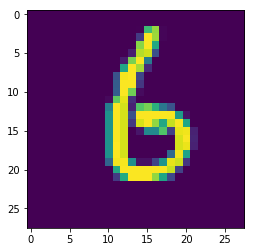

In [3]:
# visualize a random digit
rand_digit = random.randint(0, X_train.shape[0])
image = X_train[rand_digit,:]
plt.imshow(image)

In [4]:
# One hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

In [5]:
# Build and compile model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape = (28,28,1), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.fit(X_train, y_train, epochs = 6, validation_split = 0.2, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
 - 164s - loss: 1.0752 - acc: 0.8979 - val_loss: 0.0822 - val_acc: 0.9768
Epoch 2/6
 - 147s - loss: 0.0622 - acc: 0.9810 - val_loss: 0.0906 - val_acc: 0.9723
Epoch 3/6
 - 179s - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0892 - val_acc: 0.9761
Epoch 4/6
 - 181s - loss: 0.0337 - acc: 0.9894 - val_loss: 0.1029 - val_acc: 0.9782
Epoch 5/6
 - 174s - loss: 0.0298 - acc: 0.9902 - val_loss: 0.1306 - val_acc: 0.9748
Epoch 6/6
 - 143s - loss: 0.0238 - acc: 0.9933 - val_loss: 0.1361 - val_acc: 0.9767


In [7]:
y_pred = model.predict(X_test)

In [8]:
# From one hot encoding to categories for the confusion matrix
y_pred2 = []
for pred in y_pred:
    y_pred2.append(pred.tolist().index(max(pred)))

y_test2 = []
for value in y_test:
    y_test2.append(value.tolist().index(max(value)))
    


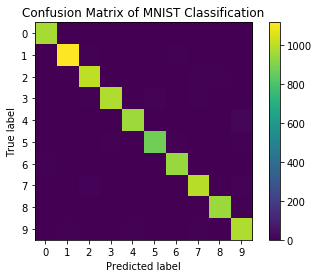

In [9]:
cm = confusion_matrix(y_test2, y_pred2)
classes = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix of MNIST Classification',
       ylabel='True label',
       xlabel='Predicted label')
plt.show()